# Correlation
- Correlation measures association, but doesn't show if x causes y or vice versa
- Correlation is a statistic that measures the degree to which two variables move in relation to each other.
- In finance, the correlation can measure the movement of a stock with that of a benchmark index, such as the S&P 500.


### Formula
- $r = \frac{\sum(X - \bar{X})(Y - \bar{Y})}{\sqrt{\sum(X - \bar{X})^2 \sum(Y - \bar{Y})^2}}$
- $r$: the correlation factor
- $\bar{X}$: the average observations of $X$
- $\bar{Y}$: the average observations of $Y$

What does it mean?
- $r$ ranges between -1 and 1 (both inclusive)
- $r = 1$: Perfect positive correlation
- $r = -1$: Perfect negative correlation
- $r = 0$: No correlation at all

### Resources
- Correlation https://www.investopedia.com/terms/c/correlation.asp
- SP500 by Market Cap https://www.slickcharts.com/sp500

In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import numpy as np

In [2]:
import pandas_datareader.data as pdr
import yfinance as yfin
yfin.pdr_override()

In [3]:
tickers = ['AAPL', 'TSLA', 'IBM', 'MSFT']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

[*********************100%***********************]  4 of 4 completed


In [4]:
data.head()

Adj Close                                         Close  \
                 AAPL         IBM        MSFT       TSLA       AAPL   
Date                                                                  
2020-01-02  73.449379  110.232513  155.761795  28.684000  75.087502   
2020-01-03  72.735306  109.353394  153.822311  29.534000  74.357498   
2020-01-06  73.314888  109.158028  154.219910  30.102667  74.949997   
2020-01-07  72.970085  109.231277  152.813766  31.270666  74.597504   
2020-01-08  74.143883  110.142967  155.247818  32.809334  75.797501   

                                                    High              ...  \
                   IBM        MSFT       TSLA       AAPL         IBM  ...   
Date                                                                  ...   
2020-01-02  129.464630  160.619995  28.684000  75.150002  129.942642  ...   
2020-01-03  128.432129  158.619995  29.534000  75.144997  128.929260  ...   
2020-01-06  128.202682  159.029999  30.102667  74.989998  128.336517  ...   
2020-01-07  128.288712  157.580002  31.270666  75.224998  129.024857  ...   
2020-01-08  129.359467  160.089996  32.809334  76.110001  129.885284  ...   

                   Low                  Open                          \
                  MSFT       TSLA       AAPL         IBM        MSFT   
Date                                                                   
2020-01-02  158.330002  28.114000  74.059998  129.063095  158.779999   
2020-01-03  158.059998  29.128000  74.287498  127.695984  158.320007   
2020-01-06  156.509995  29.333332  73.447502  127.552582  157.080002   
2020-01-07  157.320007  30.224001  74.959999  127.810707  159.320007   
2020-01-08  157.949997  31.215334  74.290001  128.594650  158.929993   

                          Volume                                
                 TSLA       AAPL      IBM      MSFT       TSLA  
Date                                                            
2020-01-02  28.299999  135480400  3293436  22622100  142981500  
2020-01-03  29.366667  146322800  2482890  21116200  266677500  
2020-01-06  29.364668  118387200  2537073  20813700  151995000  
2020-01-07  30.760000  108872000  3232977  21634100  268231500  
2020-01-08  31.580000  132079200  4545916  27746500  467164500  

[5 rows x 24 columns]

In [5]:
data = data['Adj Close']

In [6]:
data.head()

,AAPL,IBM,MSFT,TSLA
Date,,,,
2020-01-02,73.449379,110.232513,155.761795,28.684000
2020-01-03,72.735306,109.353394,153.822311,29.534000
2020-01-06,73.314888,109.158028,154.219910,30.102667
2020-01-07,72.970085,109.231277,152.813766,31.270666
2020-01-08,74.143883,110.142967,155.247818,32.809334


In [7]:
log_returns = np.log(data/data.shift())

In [8]:
log_returns

,AAPL,IBM,MSFT,TSLA
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.008007,-0.012530,0.029203
2020-01-06,0.007937,-0.001788,0.002581,0.019072
2020-01-07,-0.004714,0.000671,-0.009160,0.038067
2020-01-08,0.015958,0.008312,0.015803,0.048033
...,...,...,...,...
2023-03-27,-0.012369,0.031582,-0.015047,0.007326
2023-03-28,-0.003988,0.000232,-0.004170,-0.013753
2023-03-29,0.019597,0.002857,0.019002,0.024488


In [9]:
log_returns.corr()

,AAPL,IBM,MSFT,TSLA
AAPL,1.000000,0.457490,0.802319,0.530658
IBM,0.457490,1.000000,0.462185,0.204187
MSFT,0.802319,0.462185,1.000000,0.499783
TSLA,0.530658,0.204187,0.499783,1.000000


In [10]:
sp500 = pdr.get_data_yahoo("^GSPC", start)

[*********************100%***********************]  1 of 1 completed


In [11]:
log_returns['SP500'] = np.log(sp500['Adj Close']/sp500['Adj Close'].shift())

In [12]:
log_returns.corr()

,AAPL,IBM,MSFT,TSLA,SP500
AAPL,1.000000,0.457490,0.802319,0.530658,0.825053
IBM,0.457490,1.000000,0.462185,0.204187,0.671829
MSFT,0.802319,0.462185,1.000000,0.499783,0.850828
TSLA,0.530658,0.204187,0.499783,1.000000,0.521677
SP500,0.825053,0.671829,0.850828,0.521677,1.000000


In [13]:
def test_correlation(ticker):
    df = pdr.get_data_yahoo(ticker, start)
    lr = log_returns.copy()
    lr[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift())
    return lr.corr()

In [14]:
test_correlation("LQD")

[*********************100%***********************]  1 of 1 completed


,AAPL,IBM,MSFT,TSLA,SP500,LQD
AAPL,1.000000,0.457490,0.802319,0.530658,0.825053,0.292242
IBM,0.457490,1.000000,0.462185,0.204187,0.671829,0.215494
MSFT,0.802319,0.462185,1.000000,0.499783,0.850828,0.319579
TSLA,0.530658,0.204187,0.499783,1.000000,0.521677,0.210699
SP500,0.825053,0.671829,0.850828,0.521677,1.000000,0.357277
LQD,0.292242,0.215494,0.319579,0.210699,0.357277,1.000000


In [15]:
test_correlation("TLT")

[*********************100%***********************]  1 of 1 completed


,AAPL,IBM,MSFT,TSLA,SP500,TLT
AAPL,1.000000,0.457490,0.802319,0.530658,0.825053,-0.147338
IBM,0.457490,1.000000,0.462185,0.204187,0.671829,-0.265545
MSFT,0.802319,0.462185,1.000000,0.499783,0.850828,-0.120337
TSLA,0.530658,0.204187,0.499783,1.000000,0.521677,-0.048417
SP500,0.825053,0.671829,0.850828,0.521677,1.000000,-0.221250
TLT,-0.147338,-0.265545,-0.120337,-0.048417,-0.221250,1.000000


In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [17]:
def visualize_correlation(ticker1, ticker2):
    df = pdr.get_data_yahoo([ticker1, ticker2], start)
    df = df['Adj Close']
    df = df/df.iloc[0]
    fig, ax = plt.subplots()
    df.plot(ax=ax)

[*********************100%***********************]  2 of 2 completed


<IPython.core.display.Javascript object>


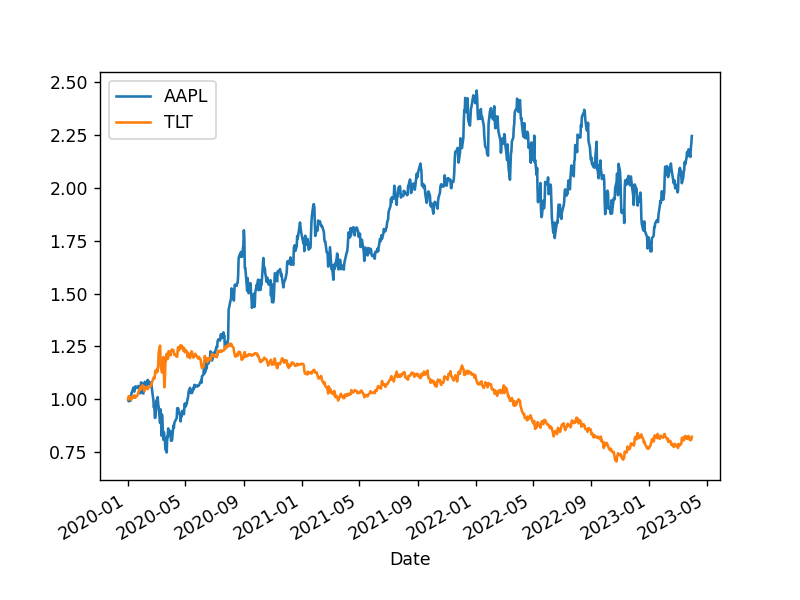

In [18]:
visualize_correlation("AAPL", "TLT")

[*********************100%***********************]  2 of 2 completed


<IPython.core.display.Javascript object>


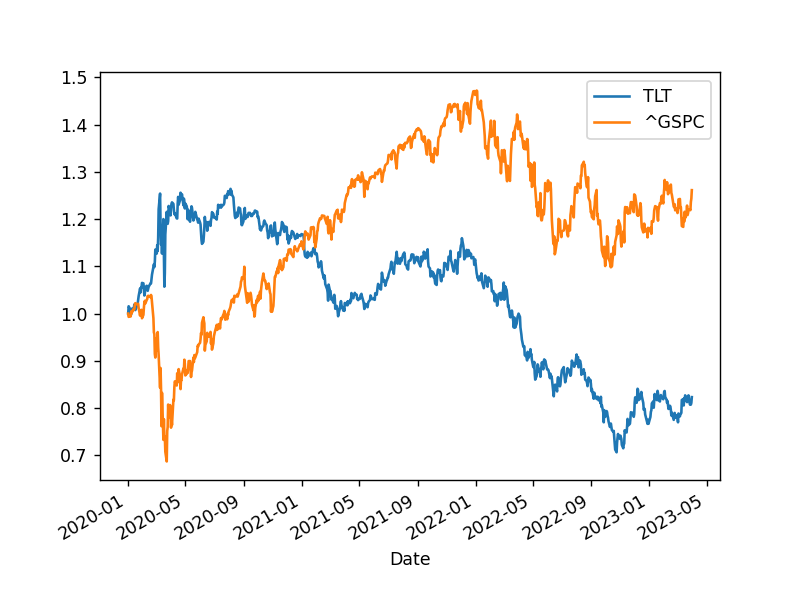

In [19]:
visualize_correlation("^GSPC", "TLT")